## Similar Images


wget http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz


In [1]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np

In [5]:
model_resnet = ResNet50(weights='imagenet', include_top =False)
model_resnet.summary()

94773248/94765736 [==============================] - 41s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
_________________________

In [9]:
def extract_features(model, img):
  x = img
  # print(x.shape)
  x = np.expand_dims(x, axis=0)
  # print(x.shape)
  x = np.array(x, dtype='float64')
  x = preprocess_input(x)

  features = model.predict(x)
  features = features.flatten()
  return features


def generate_feature_vec(model):
  X = []
  y = labels

  for i in range(len(img_arr)):
    img = img_arr[i]
    mask = mask_arr[i]
    overlay_crop_r = img_process(img, mask)
    f_set = extract_features(model, overlay_crop_r)
    X.append(f_set)
    
  return (X,y)

In [7]:
(X_res50, y) = generate_feature_vec(model_resnet)
print(len(X_res50))
print(X_res50[0].shape)
print(len(y))

NameError: name 'labels' is not defined

In [ ]:
feat_extractor_resnet = Model(inputs=model_resnet.input, outputs=model_resnet.get_layer("fc2").output)
feat_extractor_renet.summary()


In [ ]:
preds = modelresnet.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker'

Lets import keras pre-trained neural network model VGG16. We can use any of the [pre-trained](https://keras.io/applications/) models. VGG16 model, with weights pre-trained on ImageNet. The default input size for this model is 224x224.

In [2]:
model = keras.applications.VGG16(weights='imagenet', include_top=True)

In [3]:
model.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

- include_top: whether to include the 3 fully-connected layers at the top of the network.
- weights: one of None (random initialization) or 'imagenet' (pre-training on ImageNet).
- input_tensor: optional Keras tensor (i.e. output of layers.Input()) to use as image input for the model.
- input_shape: optional shape tuple, only to be specified if include_top is False (otherwise the input shape has to be (224, 224, 3) (with 'channels_last' data format) or (3, 224, 224) (with 'channels_first' data format). It should have exactly 3 inputs channels, and width and height should be no smaller than 32. E.g. (200, 200, 3) would be one valid value.
- pooling: Optional pooling mode for feature extraction when include_top is False.
- None means that the output of the model will be the 4D tensor output of the last convolutional layer.
- 'avg' means that global average pooling will be applied to the output of the last convolutional layer, and thus the -output of the model will be a 2D tensor.
- 'max' means that global max pooling will be applied.
- classes: optional number of classes to classify images into, only to be specified if include_top is True, and if no  weights argument is specified.
The output is A Keras Model instance.

### Forwarding an image through the network

In order to input an image into the network, it has to be pre-processed into a feature vector of the correct size. To help us do this, we will create a function `load_image(path)` which will handle the usual pre-processing steps: load an image from our file system and turn it into an input vector of the correct dimensions, those expected by VGG16, namely a color image of size 224x224.

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
def load_image(path):
    img = image.load_img(path,target_size=model.input_shape[1:3])
    x= image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x= preprocess_input(x)
    return img,x

### Feature extraction

What we have in the `model` variable is a highly effective image classifier trained on the ImageNet database. We expect that the classifier must form a very effective representation of the image in order to be able to classify it with such high accuracy. We can use this to our advantage by re-purposing this for another task.

What we do is we copy the model, but remove the last layer (the classification layer), so that the final layer of the new network, called `feat_extractor` is the second 4096-neuron fully-connected layer, "fc2 (Dense)".

The way we do this is by instantiating a new model called `feature_extractor` which takes a reference to the desired input and output layers in our VGG16 model. Thus, `feature_extractor`'s output is the layer just before the classification, the last 4096-neuron fully connected layer. It looks like a copy, but internally, all Keras is doing is making a pointer to each of these layers and not actually copying anything. Thus, the output "prediction" from `feat_extractor` will just be the layer `fc2` from `model`.

If we run the `summary()` function again, we see that the architecture of `feat_extractor` is identical to the original `model`, except the last layer has been removed. We also know that not just the architecture is the same, but the two have the same weights as well.

we will open a folder of images for analysis. First, the next cell will just recursively crawl the folder specified by `image_path` looking for images of the extensions inside of `image_extensions` and then limiting them to a random subset of maximum `max_num_images` images. Change these variables if you wish to change the target images.

In [5]:
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
feat_extractor.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [11]:
#images_path = '/Users/chaitanyaviriyala/cymeimagetoolbox/INRIA/testinCROPS'
images_path = '/Volumes/CYME_SSD/NewAugmentationswithR/INRIA_640_MK_apple_edits'
dirs = os.listdir(images_path)
#dirs.remove('._102402.jpg')  #as it is a hidden file can't read this on MAC OSX

image_extensions = ['.jpg','.png','.jpeg']
max_num_images = 100000

#print(os.walk(images_path))
# images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path)
#           for f in filenames
#           if os.path.splitext(f)[1].lower() in image_extensions]

images = []
for dp, dn, filenames in os.walk(images_path):
    for f in filenames:
        if '.' in f[0]:
                filenames.remove(f)
        else:        
            if os.path.splitext(f)[1].lower() in image_extensions:
                images.append(os.path.join(dp,f))


#images = [os.path.join(dp, f) for dp, dn, filenames in dirs for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]

In [12]:
if max_num_images < len(images):
    images = [images[i] for i in sorted(random.sample(range(len(images)), max_num_images))]
print("keeping %d images to analyze" % len(images))    

keeping 5968 images to analyze


### Added DB feature

In [6]:
# We use SQLite because there is 0 configuration
import sqlite3
import os
from enum import Enum

# Enum of the various feature types
class FeatureType(Enum):
    HISTOGRAM = 1
    CNN = 2
    FISHER_V = 3
    NEURAL_NETS = 4

# Database creation
# 
def createDatabase(name, folder, forceCreate):
    """
    This method will create the database with the specified name in the specified folder.
    If a database already exists at the location, it will simply return its path, unless
    forceCreate is set to **True** in which case it will delete the features table.
    """
    path = os.path.join(folder, name)
    print("Checking Database at path: {}".format(path))

    deleteTable = False
    if os.path.exists(path):
        if forceCreate == True:
            deleteTable = True
            print("Database exists: reset the table")
        else:
            return path
        
    # Create the table
    conn = sqlite3.connect(path)
    cur = conn.cursor()
    if deleteTable == True:
        cur.execute('DROP TABLE features')
        conn.commit()

    cur.execute('CREATE TABLE IF NOT EXISTS features (image_id INTEGER PRIMARY KEY, path TEXT NOT NULL, feature_type INTEGER NOT NULL, features BLOB)')
    conn.commit()
    conn.close()
    print("Database {} ready in folder: {}".format(name, folder))
    
    return path




In [7]:
import os
import numpy as np
import sqlite3
import pickle
from tqdm import tqdm


#dbPath = createDatabase(folder='/Volumes/CYME_SSD/DATABASES/', name='CNN_INRIA_mixed1.sqlite3', forceCreate=False)

dbPath = createDatabase(folder='/Volumes/CYME_SSD/DATABASES/', name='CNN_INRIA_apple_edits.sqlite3', forceCreate=False)

# open our database
conn = sqlite3.connect(dbPath)
cur = conn.cursor()

#Set in your image database path 
#IMAGE_DIR = '/Users/chaitanyaviriyala/cymeimagetoolbox/Datasets/INRIA_resized_256'

# IMAGE_DIR = '/Volumes/CYME_SSD/Augmented_Datasets/fresh_crops/Inria-dataset2-256-256'

#IMAGE_DIR = '/Volumes/CYME_SSD/NewAugmentationswithR/INRIA_640_MK_mixed'

IMAGE_DIR = '/Volumes/CYME_SSD/NewAugmentationswithR/INRIA_640_MK_apple_edits'

#IMAGE_DIR = '/Volumes/CYME Libraries/CYME ML DataSets/inria_holidays_256_256_rot'

dirs = os.listdir(IMAGE_DIR)
#dirs.remove('._102402.jpg') as it is a hidden file can't read this on MAC OSX

# for i in dirs :
#     if '.' in i:
#         dirs.remove(i)

# list of available images

image_names = [filename.split('.')[0]
               for filename in dirs
               if filename.endswith('.jpg')]

# load the SIFTs for these images
LIMIT = 100000
image_feats_CNN = []
image_paths = []
iimage = 0
for filename in tqdm(dirs[:]):
    if filename.endswith('.jpg') and (iimage < LIMIT):
        image_path = os.path.join(IMAGE_DIR,filename)
        image_paths.append(image_path)
        cur.execute('SELECT * FROM features WHERE path=? AND feature_type=?', (filename, FeatureType.CNN.value))
        row = cur.fetchone()
        if row:
            features_pickle = row[3]
            feat = pickle.loads(features_pickle)
            # print(row[1])
        else:       
            img , x = load_image(image_path);
            feat = feat_extractor.predict(x)[0]
            features_pickle = pickle.dumps(feat)
            cur.execute('INSERT INTO features (path,feature_type,features) values (?,?,?)', 
                    (filename, FeatureType.CNN.value, features_pickle))
        # print ("Image {} has descriptors of size: {}".format(iimage,descriptors.shape))
        image_feats_CNN.append(feat)
    iimage = iimage + 1
conn.commit()
    

  0%|          | 0/5968 [00:00<?, ?it/s]

Checking Database at path: /Volumes/CYME_SSD/DATABASES/CNN_INRIA_apple_edits.sqlite3


100%|██████████| 5968/5968 [00:20<00:00, 291.70it/s]


In [8]:
print(len(image_feats_CNN))

5968


In the next cell, we will begin a loop which will open each image, extract its feature vector, and append it to a list called `features` which will contain our activations for each image. This process may take a long time depending on your graphics card. Every 1000 images, you will receive a notification print-out.

Next step is to do a [principal component analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) to reduce the dimensionality of our feature vectors down to 300. We apply PCA for two reasons: 

1) the 4096-bit feature vector may have some redundancy in it, such that multiple elements in the vector are highly correlated or similar. This would skew similarity comparisons towards those over-represented features.

2) Operating over 4096 elements is inefficient both in terms of space/memory requirements and processor speed, and it would be better for us if we can reduce the length of these vectors but maintain the same effective representation. PCA allows us to do this by reducing the dimensionality down of the feature vectors from 4096 to much less, but maintain a representation which is still faithful to the original data, by preserving the relative inter-point distance.

The next cell will instantiate a `PCA` object, which we will then fit our data to, choosing to keep the top 300 principal components. This may take a few minutes.

The `pca` object stores the actual transformation matrix which was fit in the previous cell. We can now use it to transform any original feature vector (of length 4096) into a reduced 300-dimensional feature vector in the principal component space found by the PCA. 

So we take our original feature vectors, and transform them to the new space.

In [13]:
from sklearn.decomposition import PCA
features = np.array(image_feats_CNN)
pca = PCA(n_components=300)
pca.fit(features)

print(features.shape)

# Original
# from sklearn.decomposition import PCA
# features = np.array(features)
# pca = PCA(n_components=300)
# pca.fit(features)

# print(features.shape)




(5968, 4096)


In [14]:
import ntpath

pca_features = pca.transform(features)
print(pca_features.shape)
print(type(pca_features))
features_dict = {}
for idx in range(len(images)):
    image = images[idx]
    # image = image[4:]
    # print(image)
    filename = ntpath.basename(image) # get filename from path
    features_dict[filename] = pca_features[idx]
    #print(features_dict)
    


(5968, 300)
<class 'numpy.ndarray'>


The assumption we can now make is that two images which have similar content, should produce similar feature vectors. The next two cells will randomly select one image, and then compute a measurement of the dissimilarity (or distance) of that image's PCA feature vector to every other image's feature vector. The dissimilarity metric we use is [cosine distance](https://en.wikipedia.org/wiki/Cosine_similarity). 

The list `similar_idx` contains the image's similarity to every other one. We can sort that list and find the indexes of the most similar images. The next cell will sort them, and then find the most similar items, and return the indexes 5 most similar images. Notice we take from indexes 1:6 rather than 0:5 because the most similar image to the query image, will trivially be the query image itself, since it is included in the distance calculation. So we just skip it.

The next cell opens the images specified by `idx_closest` and concatenates them into a single image (resizing each so it has a height of 100 pixels.

In [36]:
import numpy as np
import faiss      # make faiss available

arr = np.array(pca_features) 
arr1 = arr.astype('float32') 

d = 300
#n_bits = 2 * d               
index = faiss.IndexFlatL2(d)   # build the index
#index = faiss.IndexLSH(d,n_bits) 
print(index.is_trained)
index.add(arr1)                  # add vectors to the index
print(index.ntotal)



True
5968


In [16]:
def show_image(filename, frame_color):
    im = imread(os.path.join(images_path, filename))
    pyplot.imshow(im)
    h, w = im.shape[:2]
    pyplot.plot([0, 0, w, w, 0], [0, h, h, 0, 0], frame_color, linewidth = 2)
    pyplot.axis('off')
    from PIL import Image

In [17]:
from matplotlib.image import imread
import matplotlib.pyplot as pyplot

def plotimg(path): 
    
    img = Image.open(path)
    basewidth = 124
    wpercent = (basewidth/float(img.size[0]))
    hsize = int((float(img.size[1])*float(wpercent)))
    im_resized = img.resize((basewidth,hsize), Image.ANTIALIAS)

    pyplot.imshow(im_resized)
    pyplot.axis('off')
    pyplot.show()

dataset_name = IMAGE_DIR

def getClosestFaiss(img_name,u):
    D, I = index.search(arr1, u)     # actual search
    if img_name in image_names :
        for i, j in enumerate(image_names):
            if j == img_name:
                k = I[i]
                print('Images',I[i])
                print('Distances',D[i])
                print('Given query image:',img_name)
                print('Nearest',u, 'neighbours using FAISS:')
                for i in range(len(k)):
                    print(image_names[k[i]])
                    #show_image(image_names[k[i]], 'w')
                    #image = ColorThief(dataset_name + image_names[k[i]]+ '.jpg' )
                    #palette = image.get_palette(quality=5)
                    #figure = sns.palplot([tuple(i / 255 for i in j) for j in palette[:5]])
                    #pyplot.show(figure)
                    #print(dataset_name +  +'/'+ image_names[k[i]]+ '.jpg')
                    #plotimg(dataset_name +'/'+ image_names[k[i]]+ '.jpg' )
    else :
        print('image not in folder')
        


In [18]:
dataset_name = IMAGE_DIR
query_image = '101700'
number_of_neighbours = 5
getClosestFaiss(query_image,number_of_neighbours)

Images [  11 1525   81 1735 1526]
Distances [   0.       383.34766  758.48926  941.9512  1008.2178 ]
Given query image: 101700
Nearest 5 neighbours using FAISS:
101700
101700_m1
101701
101701_m1
101700_m2


In [18]:
from scipy.spatial import distance

dist_values = []
dist_val = []

def get_closest_images_2(filename, num_results=50):
    
    distances = [
        (f, distance.cosine(features_dict[filename],feat))
        for f, feat in features_dict.items()
    ]
    
    distances_2 = [[]]

    closest = sorted(
        distances, key=lambda k: k[1]
    )[0:num_results]
    you = closest[:num_results]
    #print(closest[:num_results])
    return you
    #return [entry[0] for entry in closest]

In [19]:
from scipy.spatial import distance

dist_values = []
dist_val = []

def get_closest_images(filename, num_results=50):
    distances = [
        (f, distance.cosine(features_dict[filename],feat))
        for f, feat in features_dict.items()
    ]
#     print(distances[:3])
#     print(
#         [distance for filename, distance in distances]
#     )
    closest = sorted(
        distances, key=lambda k: k[1]
    )[0:num_results]
#     i=1
#     while i<num_results :
#          dist_values.append(closest[i][1]) 
#          i+=1
#     dist_val.append(dist_values)   
    #print(dist_val)
    #print(closest[:num_results])
    return [entry[0] for entry in closest]

def get_concatenated_images(filenames, thumb_height):
    thumbs = []
    for filename in filenames:
        img= image.load_img(os.path.join(images_path, filename))
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis= 1)
    return concat_image
        

In [20]:
filename = '123205.jpg'
items = list(features_dict.items())
items = items[:2]
[(f, distance.cosine(features_dict[filename],feat)) for f, feat in items]

#distance.cosine(features_dict[filename], items[0][1])
# filename
#features_dict[filename]

[('126803.jpg', 1.0742883533239365), ('122901_c4.jpg', 1.0519007593393326)]

In [21]:
#get_closest_images(filename, num_results=8)

a1 = '123205.jpg'
a2 = '123500.jpg'


q1 = set([a1,a2])
o_l = []
for f in q1:
    me = get_closest_images_2(f,8)
    #print(me)
    me_l = []
    for i in me:
        me_l.append(i[1])
    o_l.append(me_l)
print(o_l)
    
import numpy as np
x = np.array(o_l)
print(x)


[[0.0, 0.2166476845741272, 0.2736769914627075, 0.2759166955947876, 0.2821102738380432, 0.2849881052970886, 0.28893858194351196, 0.2896237373352051], [0.0, 0.17330831289291382, 0.1750597357749939, 0.17565679550170898, 0.2012884020805359, 0.2120358943939209, 0.24709659814834595, 0.24764221906661987]]
[[0.         0.21664768 0.27367699 0.2759167  0.28211027 0.28498811
  0.28893858 0.28962374]
 [0.         0.17330831 0.17505974 0.1756568  0.2012884  0.21203589
  0.2470966  0.24764222]]


In [22]:
distance.cosine(features_dict[filename], items[0][1])

1.0742883533239365

Text(0.5, 1.0, 'result images')

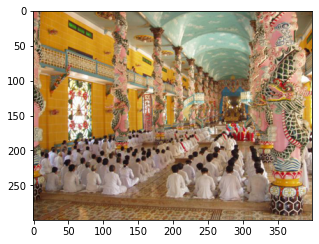

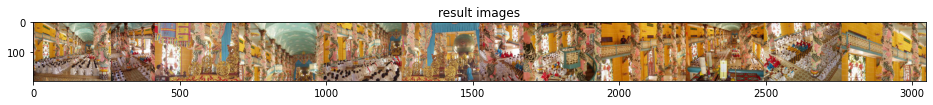

In [26]:
from keras.preprocessing import image

filename = '123205.jpg'
closest = get_closest_images(filename)
query_image = get_concatenated_images([filename],300)
results_image = get_concatenated_images(closest, 200)

plt.figure(figsize = (5,5))
plt.imshow(query_image)
#plt.title("query image (%d)" % query_image_idx)

plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")



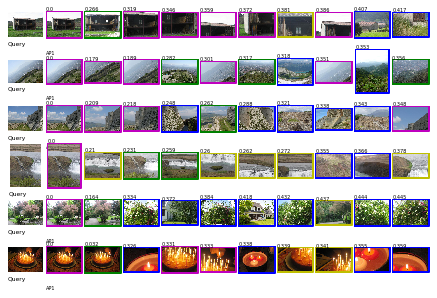

In [53]:
import matplotlib.pyplot as pyplot
from matplotlib.image import imread
import numpy as np


# some standard queries 

# PUFFIN_QUERY_IMAGE = '107500.jpg'
# PUFFIN_QUERY_IMAGE_BW = '128700.jpg'
# PUFFIN_QUERY_IMAGE_COLORED = '145400.jpg'
# BEACH_QUERY_IMAGE = '132900.jpg'
# BEACH_QUERY_IMAGE_SATURATED = '139400.jpg'
# CASCADE_QUERY_IMAGE = '116900.jpg'


a1 = '148200.jpg'
a2 = '144800.jpg'
a3 = '116200.jpg'
a4 = '129800.jpg'
a5 = '134500.jpg'
a6 = '128600.jpg'




# get the indices of the query images (the subset of images that end in "00")
# query_names = set([PUFFIN_QUERY_IMAGE,PUFFIN_QUERY_IMAGE_BW,PUFFIN_QUERY_IMAGE_COLORED, 
#                    BEACH_QUERY_IMAGE, 
#                    CASCADE_QUERY_IMAGE])

# query_names = [PUFFIN_QUERY_IMAGE_BW,PUFFIN_QUERY_IMAGE,
#                    BEACH_QUERY_IMAGE, BEACH_QUERY_IMAGE_SATURATED,
#                    CASCADE_QUERY_IMAGE,PUFFIN_QUERY_IMAGE_COLORED, ]

query_names = [a1, a2, a3, a4, a5, a6 ]


######
def show_image(filename, frame_color):
    im = imread(os.path.join(images_path, filename))
    pyplot.imshow(im)
    h, w = im.shape[:2]
    pyplot.plot([0, 0, w, w, 0], [0, h, h, 0, 0], frame_color, linewidth = 2)
    pyplot.axis('off')
    
    

# reduce the margins
pyplot.subplots_adjust(wspace = 0, hspace = 0,
                       top = 0.99, bottom = 0.01, left = 0.01, right = 0.99)

no = 1  # index current of subfigure
index_text_row = 0
nrow = len(query_names)   # number of query images to show
nres = 10   # number of results per query
stor_var = []

o_l1 =[]

# find the 
for filename in query_names: 
    #print(filename)
    pyplot.subplot(nrow, nres + 1, no); no += 1
    #pyplot.annotate('Query Image', xy = (0,0),fontsize ='7')
    #pyplot.annotate('Query', xy=(0,0), xycoords= 'axes pixels',fontsize ='6')
    pyplot.annotate('Query', xy=(0,-6), xycoords= 'axes pixels', fontsize ='6')
    closest = get_closest_images(filename,nres)
    distances_numbers = get_closest_images_2(filename)
    me1 = get_closest_images_2(filename,nres)
    #print(me)
    me_l1 = []
    for i in me1:
        me_l1.append(i[1])
    o_l1.append(me_l1)
    distances_values = np.array(o_l1)

#     query_image = get_concatenated_images([filename],300)
#     results_image = get_concatenated_images(closest, 200)
    
    # print(results_image)
    show_image(filename, 'w')
    
    index_text_column = 0
    
     #dummy variables created for the table 
    d1 = ''; 
    d2 = ''; 
    d3 = ''; 
    d4 = ''; 

    

    for qres in closest:
        pyplot.subplot(nrow, nres + 1, no)
        if no % (nres+1) == 2 :
            pyplot.annotate('AP1', xy=(0,-15), xycoords= 'axes pixels', fontsize ='5')
        pyplot.annotate(round(distances_values[index_text_row,index_text_column],3), xy = (0,0),fontsize ='5')
        no += 1    
        #pyplot.suptitle('My Title', y=0.92)
        
        # use image name to determine if it is a TP or FP result
        # we compare the first 8 char of the image name
        
        
        text_remark = 'not similar image'
        is_ok = filename[:4] == qres[:4]
        is_crop = filename[:6] == qres[:6]
        if is_ok :
            color = 'g'
            if 'c' in qres :
                color = 'y'
            if is_crop :    
                color = 'm'
        else:
            color = 'b'
            
        show_image(qres, color)
        
        
        if 'r' in qres :
            if is_ok : 
                text_remark = 'other similar cropped '
            else :
                text_remark = 'not similar cropped'
            if is_crop : 
                text_remark = 'original cropped'
        else:
            if is_ok :
                text_remark = 'other similar image'
            if is_crop : 
                text_remark = 'original image'
        
        d1 += (','+ qres)
        d2 += (','+ str(round(distances_values[index_text_row,index_text_column],3)))
        d3 += (','+ str(is_ok))
        d4 += (',' + text_remark)
        
        index_text_column += 1
    
    d5 = qres + ',' + str(nres) + d1 + d2 + d3 + d4
    stor_var.append(list(d5.split(',')))
    #print(stor_var)     
    index_text_row += 1

   

file_name = 'CNNINRIACrops1_New'
output_dir = '/Users/chaitanyaviriyala/cymeimagetoolbox/INRIA/'
figurePath = output_dir + file_name + '.png'
#pyplot.title('CVLFeat_Rotations')
pyplot.savefig(figurePath, dpi=300)  
#plt.savefig('myfigure_300.png', dpi=300)
pyplot.show()


In [22]:
import xlsxwriter


with xlsxwriter.Workbook('/Users/chaitanyaviriyala/Desktop/CNNCrops.xlsx') as workbook:
    worksheet = workbook.add_worksheet()

    for row_num, data in enumerate(stor_var):
        worksheet.write_row(row_num, 0, data)

In [23]:
import sys

from typing import List

def compute_ap(pos: List[str], ranked_list: List[str]):
    """Compute average precision against a retrieved list of images. There are some bits that
    could be improved in this, but is a line-to-line port of the original C++ benchmark code.
    Args:
        pos (List[str]): List of positive samples. This is normally a conjugation of
        the good and ok samples in the ground truth data.
        amb (List[str]): List of junk samples. This is normally the junk samples in
        the ground truth data. Omitting this makes no difference in the AP.
        ranked_list (List[str]): List of retrieved images from query to be evaluated.
    Returns:
        float: Average precision against ground truth - range from 0.0 (worst) to 1.0 (best).
    """

    intersect_size, old_recall, ap = 0.0, 0.0, 0.0
    old_precision, j = 1.0, 1.0

    for e in ranked_list:

        if e in pos:
            intersect_size += 1.0

        recall = intersect_size / len(pos)
        precision = intersect_size / j
        ap += (recall - old_recall) * ((old_precision + precision) / 2.0)

        old_recall = recall
        old_precision = precision
        j += 1.0

    return ap

In [16]:
def get_index_result(closest1):
    result_index_of_numbers = []
    for qres in closest1:
        #print(qres) 
        for i, name in enumerate(dirs):
            if name == qres:
                result_index_of_numbers.append(i)
    return result_index_of_numbers

closest1 = ['100001.jpg', '100503.jpg', '100502.jpg', '100002.jpg', '100501.jpg', '100500.jpg', '100400.jpg', '100300.jpg', '111401.jpg', '111400.jpg', '129001.jpg', '102400.jpg', '102401.jpg', '144801.jpg', '100200.jpg']
print(get_index_result(closest1))

[1349, 864, 903, 1447, 813, 772, 1212, 932, 676, 716, 665, 1333, 1383, 791, 1432]


In [25]:
a1 = '100000.jpg'
a2 = '100502.jpg'
a3 = '100901.jpg'
a4 = '100902.jpg'
a5 = '102701.jpg'
a6 = '102800.jpg'
a7 = '102802.jpg'
a8 = '100001.jpg'
a9 = '104001.jpg'

query_names = ([a1,a2,a3])

result_index_of_names = []


closest_all = []
for filename in query_names: 
    closest = get_closest_images(filename)
    closest_all.append(closest)
    result_index_of_numbers = []
    for i in range(len(closest_all)):
        k = get_index_result(closest_all[i])
        result_index_of_numbers.append(k)
        
    #print((closest))
print(result_index_of_numbers)

[[8196, 8076, 8535, 5204, 3075, 2517, 3664, 7152, 8642, 5438, 4864, 4637, 7730, 7374, 8840, 2589, 4076, 5677, 6930, 7400, 4029, 8769, 4307, 7719, 3646, 8002, 7113, 4732, 6562, 8270, 6081, 8568, 8478, 8405, 1233, 6650, 8242, 6887, 4956, 5442, 172, 6183, 3435, 3763, 164, 6707, 3234, 3529, 5587, 2475], [5438, 5204, 4864, 6562, 8535, 2517, 4956, 4637, 6183, 4613, 3664, 8769, 5694, 6314, 4542, 8076, 5677, 1138, 6057, 3075, 818, 5587, 164, 8642, 7730, 5442, 5621, 1233, 8840, 6930, 8196, 5810, 6186, 4307, 5597, 5927, 3542, 5189, 31, 3529, 8002, 6703, 8270, 4732, 4076, 8405, 3530, 6707, 2589, 4093], [4187, 7219, 6788, 8369, 3107, 3740, 2886, 8045, 8590, 7663, 4033, 2537, 255, 1694, 3813, 5987, 3181, 6247, 3100, 323, 1754, 5507, 965, 3500, 6052, 3250, 3472, 2965, 2412, 4895, 1362, 5310, 7917, 4773, 6535, 7507, 6637, 2208, 8464, 4098, 8186, 8299, 1171, 1662, 4357, 821, 1205, 3566, 5127, 8629]]


In [37]:
IMAGE_DIR = IMAGE_DIR
dirs = os.listdir(IMAGE_DIR)
print(dirs[:2])

image_names = [filename.split('.')[0]
               for filename in dirs
               if filename.endswith('.jpg')]

#print(image_names)

# get the indices of the query images (the subset of images that end in "00")
query_imnos = [i for i, name in enumerate(image_names) if name.split('.')[0][-2:] == "00"]
query_imnos_m3 = [i for i, name in enumerate(image_names) if name.split('.')[0][-5:] == "00_m3"]
queries_ending_00 = [name for i, name in enumerate(dirs) if name.split('.')[0][-2:] == "00"]
queries_ending_00_m3 = [name for i, name in enumerate(dirs) if name.split('.')[0][-5:] == "00_m3"]
print((query_imnos[:2]))
print(queries_ending_00[:2])

['126803.jpg', '105002.jpg']
[11, 12]
['101700.jpg', '105200.jpg']


In [27]:
closest_all = []
for filename in queries_ending_00: 
    closest = get_closest_images(filename)
    closest_all.append(closest)
    results = []
    for i in range(len(closest_all)):
        k = get_index_result(closest_all[i])
        results.append(k)
        
print(len(results))

NameError: name 'get_closest_images' is not defined

In [18]:
def getClosestFaiss1(img_name,u):
    D, I = index.search(arr1, u)     # actual search
    if img_name in dirs :
        for i, j in enumerate(dirs):
            if j == img_name:
                k = I[i]
                print('Images',I[i])
                print('Distances',D[i])
                print('Given query image:',img_name)
                print('Nearest',u, 'neighbours using FAISS:')
                for i in range(len(k)):
                    print(image_names[k[i]])
                   
    else :
        print('image not in folder')
        

getClosestFaiss1('101700.jpg',5)

Images [   11 16186 16185 16183 16184]
Distances [9.7656250e-04 9.6443359e+01 1.5060645e+02 3.1919824e+02 3.5585449e+02]
Given query image: 101700.jpg
Nearest 5 neighbours using FAISS:
101700
101700_r1
101700_r2
101700_r4
101700_r3


In [38]:
def getClosestFaiss2(img_name,u):
    D, I = index.search(arr1, u)     # actual search
    if img_name in dirs :
        for i, j in enumerate(dirs):
            if j == img_name:
                k = I[i]
                #print('Images',I[i])
                #print('Distances',D[i])
                return I[i]
                   
    else :
        print('image not in folder')
        

#print(getClosestFaiss2('101700.jpg',50))


results1 = []
for filename in queries_ending_00_m3: 
    closest1 = getClosestFaiss2(filename,50)
    results1.append(closest1)
    
        
print(len(results1))

500


In [43]:
def getClosestFaiss23(img_name,u):
    D, I = index.search(arr1, u)     # actual search
    if img_name in image_names :
        for i, j in enumerate(image_names):
            if j == img_name:
                k = I[i]
                #print('Images',I[i])
                #print('Distances',D[i])
                return I[i]
                   
    else :
        print('image not in folder')

In [39]:
print(results1[:2])

[array([1527, 1737, 4611, 2721, 5391, 4719, 2025, 2253, 5094, 2322, 4503,
       2865, 1039, 5655, 2214, 2208,  581, 3411, 3957, 3540, 3834, 2496,
       2475,  639, 2550, 4609, 2136, 5352, 3813, 3084, 4317, 3450, 2340,
       3912, 4200, 4080, 2568, 4578, 2295, 3942, 3042, 5850, 2577,  409,
       3237, 2151, 4610, 3798, 3235, 1767]), array([1530, 5046, 1773, 3390, 5121, 4677, 5178, 5961, 3093, 2193, 1746,
       2310, 4794, 5343, 3993, 3132, 2772, 4194, 1767, 4446, 4644, 1965,
       3501, 3834, 5163, 5835, 3912, 1743, 4128, 3219, 4905, 5265, 5217,
       2649, 1668, 3474, 5412, 3039, 3288, 3426, 5115, 5940, 5913, 4263,
       1629, 2061, 3804, 3357, 1758, 2913])]


In [40]:
import matplotlib.pyplot as plt
import numpy as np

aps1 = []
aps2 = []
aps3 = []
index = 0
out = open('CNN_INRIA_APPLE_00_m3_TD2.csv', 'w')
query_name_list = []
title = "qName, AP1_CNN, AP2_CNN, AP3_CNN\n"
out.write(title)


for qimno, qres in zip(query_imnos_m3, results1):
    qname = image_names[qimno]
    query_name_list.append(qname)
    
    # cluster size 
    # elements of the cluster have the same first 4 char but are no variants
    cluster = set([name for i, name in enumerate(image_names)
                            if name[:6] == qname[:6] and '_' not in name])
    
    # collect the positive results in the dataset
    
    # AP1: the positives are the images that are a variation of the original
    # i.e the positives have the same prefix as the query image
#     positive_results_1 = set([name for i, name in enumerate(image_names)
#                             if name.split('_')[0] == qname.split('.')[0]])
    
    positive_results_1 = set([name for name in image_names
                            if name[:6] == qname[:6]])
    
    #print('Pos Results 1',positive_results_1)
    pos_res_1 = list(positive_results_1)
    #print('Pos Res1 List', pos_res_1)
    

    # AP2: the positives are the images that are a variation of the original or variations of the images in the cluster
    # i.e the positives have the same prefix as the query image

    positive_results_2 = set([name for i, name in enumerate(image_names)
                            if name[:4] == qname[:4]])
    pos_res_2 = list(positive_results_2)
    pos_res_3 = pos_res_2
    #print('Pos Res 2 et 3', pos_res_2)
    
    
    # these are the sizes to use to restrict our positive sets
    variants_count = len(positive_results_1)
    #print('Var Count', variants_count)
    variants_and_similar_counts = len(positive_results_2)
    #print('Var et Sim Count', variants_and_similar_counts)


    # ranks of positives. 
    # we do include the query ... that's just a computation choice
    
    
    ranks_1 = map(lambda i: image_names[i], qres[0:variants_count])
    ranks_1_list = list(ranks_1)
    #print('Ranks list 1', ranks_1_list)
    
    ranks_2 = map(lambda i: image_names[i], qres[0:variants_and_similar_counts])
    ranks_2_list = list(ranks_2)
    #print('Ranks list 2', ranks_2_list)
    
    
#     print('Len(POS_RES_1)',len(pos_res_1))
#     print('Len(Ranks_1)',len(ranks_1_list))
#     print('Len(POS_RES_2)',len(pos_res_2))
#     print('Len(Ranks_2)',len(ranks_2_list))
    
    
    
    ranks_3 = map(lambda i: image_names[i], qres)
    ranks_3_list = list(ranks_3)
    #print('Ranks list 3', ranks_3_list)

#     if len(pos_res_1) > 0:
#         ap1 = compute_ap(pos_res_1,ranks_1_list)
    ap1 = compute_ap(pos_res_1,ranks_1_list)
    ap2 = compute_ap(pos_res_2,ranks_2_list)
    ap3 = compute_ap(pos_res_3,ranks_3_list)
   

    
    
    out.write("%s,%.3f,%.3f,%.3f\n" % (qname, ap1, ap2, ap3))
    # print("query %s, cluster_size = %d, variants_count = %d, variants_and_similar_counts = %d" % (qname, len(cluster), variants_count, variants_and_similar_counts))
    # print (sorted(cluster))
    # print (sorted(pos_res_1))
    # print (sorted(pos_res_2))
    print("query %s, AP1 = %.3f, AP2 = %.3f, AP3 = %.3f" % (qname, ap1, ap2, ap3))

    aps1.append(ap1)
    aps2.append(ap2)
    aps3.append(ap3)
#     plt.plot([qname],[ap], 'ro')
#     plt.xlabel('Query_Image_Number')
#     plt.ylabel('AVERAGE PRESICION')
#     plt.title('AP VS Qyery')
    

out.close()
length = len(query_imnos)
print("mean AP1 of %s query_imnos is = %.3f" % (length, np.mean(aps1)))
print("mean AP2 of %s query_imnos is = %.3f" % (length, np.mean(aps2)))
print("mean AP3 of %s query_imnos is = %.3f" % (length, np.mean(aps3)))

query 101700_m3, AP1 = 0.250, AP2 = 0.198, AP3 = 0.198
query 105200_m3, AP1 = 0.250, AP2 = 0.125, AP3 = 0.132
query 148300_m3, AP1 = 0.250, AP2 = 0.177, AP3 = 0.177
query 131600_m3, AP1 = 0.250, AP2 = 0.250, AP3 = 0.250
query 135300_m3, AP1 = 0.250, AP2 = 0.398, AP3 = 0.576
query 140600_m3, AP1 = 0.250, AP2 = 0.250, AP3 = 0.250
query 109200_m3, AP1 = 0.250, AP2 = 0.250, AP3 = 0.250
query 144300_m3, AP1 = 0.250, AP2 = 0.194, AP3 = 0.216
query 139300_m3, AP1 = 0.573, AP2 = 0.410, AP3 = 0.508
query 117200_m3, AP1 = 0.250, AP2 = 0.250, AP3 = 0.250
query 113700_m3, AP1 = 0.250, AP2 = 0.125, AP3 = 0.129
query 127300_m3, AP1 = 0.250, AP2 = 0.125, AP3 = 0.125
query 123600_m3, AP1 = 0.250, AP2 = 0.250, AP3 = 0.250
query 142200_m3, AP1 = 0.250, AP2 = 0.250, AP3 = 0.250
query 146700_m3, AP1 = 0.250, AP2 = 0.125, AP3 = 0.130
query 125700_m3, AP1 = 0.250, AP2 = 0.250, AP3 = 0.427
query 121200_m3, AP1 = 0.250, AP2 = 0.125, AP3 = 0.125
query 115600_m3, AP1 = 0.250, AP2 = 0.250, AP3 = 0.250
query 1113

In [34]:
import pandas as pd

print(len(query_name_list))
print(len(aps1))
print(len(aps2))
print(len(aps3))




df1 = pd.DataFrame(list(zip(query_name_list, aps1, aps2, aps3)), 
               columns =["QueryName","AP1", "AP2","AP3"]) 
df1.head(3)
df1.shape

df2 = df1.sort_values(['AP1'], ascending=[True])
print(df2.head(5))
query_image_name1 = df2['QueryName'].tolist()
print(query_image_name1[:5])


df3 = df1.sort_values(['AP2'], ascending=[True])
print(df3.head(3))
query_image_name2 = df3['QueryName'].tolist()
print(query_image_name2[:5])



df4 = df1.sort_values(['AP3'], ascending=[True])
print(df4.head(3))
query_image_name3 = df4['QueryName'].tolist()
print(query_image_name3[:5])

500
500
500
500
     QueryName       AP1       AP2       AP3
413  103900_c1  0.075758  0.074929  0.080177
269  136500_c1  0.090909  0.026028  0.026028
451  123800_c1  0.090909  0.142436  0.186781
307  116200_c1  0.090909  0.045455  0.045455
251  112500_c1  0.090909  0.045455  0.045455
['103900_c1', '136500_c1', '123800_c1', '116200_c1', '112500_c1']
     QueryName       AP1       AP2       AP3
130  146400_c1  0.115152  0.020103  0.020103
25   126800_c1  0.181818  0.021602  0.021602
155  113400_c1  0.090909  0.023923  0.023923
['146400_c1', '126800_c1', '113400_c1', '144800_c1', '138200_c1']
     QueryName       AP1       AP2       AP3
130  146400_c1  0.115152  0.020103  0.020103
25   126800_c1  0.181818  0.021602  0.021602
155  113400_c1  0.090909  0.023923  0.023923
['146400_c1', '126800_c1', '113400_c1', '144800_c1', '138200_c1']


In [45]:
def getClosestFaissdist(img_name,u):
    D, I = index.search(arr1, u)     # actual search
    if img_name in image_names :
        for i, j in enumerate(image_names):
            if j == img_name:
                k = D[i]
                #print('Images',I[i])
                #print('Distances',D[i])
                return D[i]
                   
    else :
        print('image not in folder')
        
print(getClosestFaissdist('101700',5))

[  0.        96.569336 151.50684  320.4912   357.59766 ]


['103900_c1', '136500_c1', '123800_c1', '116200_c1', '112500_c1']
103900_c1
image not in folder
None


IndexError: invalid index to scalar variable.

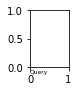

In [47]:
import matplotlib.pyplot as pyplot
from matplotlib.image import imread
import numpy as np


# some standard queries 

# PUFFIN_QUERY_IMAGE = '107500.jpg'
# PUFFIN_QUERY_IMAGE_BW = '128700.jpg'
# PUFFIN_QUERY_IMAGE_COLORED = '145400.jpg'
# BEACH_QUERY_IMAGE = '132900.jpg'
# BEACH_QUERY_IMAGE_SATURATED = '139400.jpg'
# CASCADE_QUERY_IMAGE = '116900.jpg'


a1 = '148200.jpg'
a2 = '144800.jpg'
a3 = '116200.jpg'
a4 = '129800.jpg'
a5 = '134500.jpg'
a6 = '128600.jpg'




# get the indices of the query images (the subset of images that end in "00")

# query_names = [a1, a2, a3, a4, a5, a6 ]

query_names = query_image_name1[:5]
print(query_names)

######
def show_image(filename, frame_color):
    im = imread(os.path.join(images_path, filename))
    pyplot.imshow(im)
    h, w = im.shape[:2]
    pyplot.plot([0, 0, w, w, 0], [0, h, h, 0, 0], frame_color, linewidth = 2)
    pyplot.axis('off')
    
    

# reduce the margins
pyplot.subplots_adjust(wspace = 0, hspace = 0,
                       top = 0.99, bottom = 0.01, left = 0.01, right = 0.99)

no = 1  # index current of subfigure
index_text_row = 0
nrow = len(query_names)   # number of query images to show
nres = 10   # number of results per query
stor_var = []

o_l1 =[]

# find the 
for filename in query_names: 
    print(filename)
    pyplot.subplot(nrow, nres + 1, no); no += 1
    #pyplot.annotate('Query Image', xy = (0,0),fontsize ='7')
    #pyplot.annotate('Query', xy=(0,0), xycoords= 'axes pixels',fontsize ='6')
    pyplot.annotate('Query', xy=(0,-6), xycoords= 'axes pixels', fontsize ='6')
    closest = getClosestFaiss2(filename,nres)
    print(closest)
    distances_numbers = getClosestFaissdist(filename,nres)
    me1 = getClosestFaissdist(filename,nres)
    #print(me)
    me_l1 = []
    for i in me1:
        me_l1.append(i[1])
    o_l1.append(me_l1)
    distances_values = np.array(o_l1)

#     query_image = get_concatenated_images([filename],300)
#     results_image = get_concatenated_images(closest, 200)
    
    # print(results_image)
    show_image(filename, 'w')
    
    index_text_column = 0
    
     #dummy variables created for the table 
    d1 = ''; 
    d2 = ''; 
    d3 = ''; 
    d4 = ''; 

    

    for qres in closest:
        pyplot.subplot(nrow, nres + 1, no)
        if no % (nres+1) == 5 :
            pyplot.annotate('AP1 ='+ str(round(m1[1],3))+' '+'AP2 ='+ str(round(m1[2],3))+' '+'AP3 ='+ str(round(m1[3],3))
                            , xy=(0,-25), xycoords= 'axes pixels', fontsize ='5')
        
        no += 1    
        #pyplot.suptitle('My Title', y=0.92)
        
        # use image name to determine if it is a TP or FP result
        # we compare the first 8 char of the image name
        
        
        text_remark = 'not similar image'
        is_ok = filename[:4] == qres[:4]
        is_crop = filename[:6] == qres[:6]
        if is_ok :
            color = 'g'
            if 'c' in qres :
                color = 'y'
            if is_crop :    
                color = 'm'
        else:
            color = 'b'
            
        show_image(qres, color)
        
        
        if 'r' in qres :
            if is_ok : 
                text_remark = 'other similar cropped '
            else :
                text_remark = 'not similar cropped'
            if is_crop : 
                text_remark = 'original cropped'
        else:
            if is_ok :
                text_remark = 'other similar image'
            if is_crop : 
                text_remark = 'original image'
        
        d1 += (','+ qres)
        d2 += (','+ str(round(distances_values[index_text_row,index_text_column],3)))
        d3 += (','+ str(is_ok))
        d4 += (',' + text_remark)
        
        index_text_column += 1
    
    d5 = qres + ',' + str(nres) + d1 + d2 + d3 + d4
    stor_var.append(list(d5.split(',')))
    #print(stor_var)     
    index_text_row += 1

   

file_name = 'CNNINRIAMIXED_c1'
output_dir = '/Users/chaitanyaviriyala/cymeimagetoolbox/INRIA/'
figurePath = output_dir + file_name + '.png'
#pyplot.title('CVLFeat_Rotations')
pyplot.savefig(figurePath, dpi=300)  
#plt.savefig('myfigure_300.png', dpi=300)
pyplot.show()

